# 振动与混沌系统

振动这种运动模式出现在物理世界的各个角落。从基本粒子的尺度到天体运行的尺度，振动无处不在。而其中，`简谐振动`是一种最常见，最基本的振动模式。

我们将从最简单的振动模式----单摆的运动谈起

## 1. 简单单摆

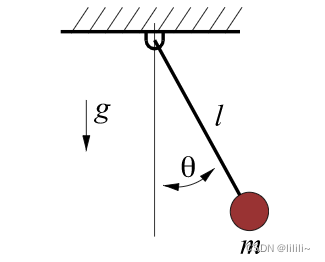

对于一个简单单摆系统，我们往往做以下几点假设：

1. 弦无质量且总是完全拉紧。
2. 转轴无摩擦且无空气阻力。
3. 重物可被视为一个质点。
4. 摆动角度很小。

基于这些假设，我们可以得到在$\theta$摆动方向只存在重力的分量:
$$
F_{\theta} = - mg \sin \theta
$$

在$\theta$较小时，牛顿第二定律可得方程：
$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \theta
$$

存在通解：
$$
\theta = \theta_0 \sin (\Omega t  + \phi)
$$

还是类似的，为了在计算机上求解这个问题，我们还是类似的把该二阶微分方程写成两个一阶微分方程：

$$
\begin{eqnarray}
\frac{d\omega}{dt} &=& -\frac{g}{l} \theta \\
\frac{d\theta}{dt} &=& \omega,
\end{eqnarray}
$$

同样适用欧拉方法，我们可以写出这个方程组的离散形式：
$$
\begin{eqnarray}
\omega_{i+1} &=& \omega_{i} - \frac{g}{l} \theta_i \Delta t \\
\theta_{i+1} &=& \theta_{i} + \omega_i \Delta t
\end{eqnarray}
$$
下面，让我们写出一个简单的程序来计算这些。

In [6]:
import numpy as np
def pend(l, dt, tf):
    t = 0
    omega, theta, ts = [0], [np.pi/18], [t]

    while(t < tf):
        omega.append(omega[-1] - 9.8 * theta[-1] * dt / l) 
        theta.append(theta[-1] + omega[-2] * dt)  # 注意，这里用的是omega[-2]，思考一下为什么
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(ts))

我们这次新建一个做图函数，从而可以不再重复复制粘贴用以做图的代码：

In [167]:
import matplotlib.pyplot as plt

def curve_plot(xs, ys, xlabel='x', ylabel='y', legends=None, islog=False, 
               xlim=None, ylim=None, scatter=False):

    if isinstance(xs, np.ndarray):
        xs = [xs]
    if isinstance(ys, np.ndarray):
        ys = [ys]
    
    # 调整图片的大小
    plt.figure(figsize=(10,6))
    
    # 画出轨迹
    for x, y in zip(xs, ys):
        if(scatter == False):
            plt.plot(x, y)
        else:
            plt.scatter(x,y)
    
    # 加入x轴标记
    plt.xlabel(xlabel, fontsize=24)
    # 加入y轴标记
    plt.ylabel(ylabel, fontsize=24)

    if(legends != None):
        plt.legend(legends, fontsize=24)
    if(xlim != None):
        plt.xlim(xlim)
    if(ylim != None):
        plt.ylim(ylim)
    if(islog == True):
        plt.yscale('log')
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

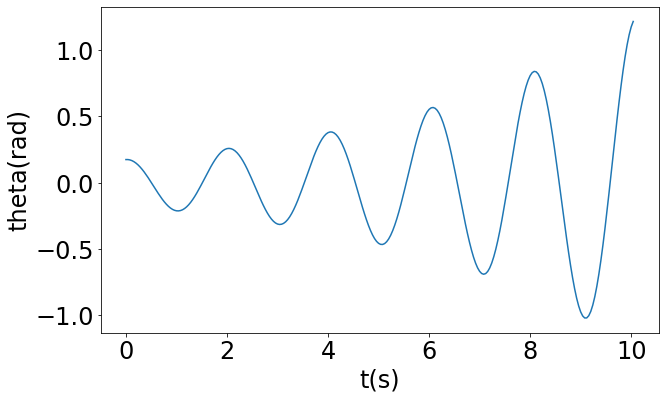

In [32]:
import matplotlib.pyplot as plt

tf = 10
l = 1
dt = 0.04

theta, omega, ts = pend(l, dt, tf)

curve_plot(ts, theta, 't(s)', 'theta(rad)')

由上图可以看出一个很奇怪的地方，单摆的振幅会随着时间变大，这显然不符合真实，也和解析解不一致！

我们可以尝试逐渐减小$\Delta t$，会发现增长的振幅逐渐减小。这也提示了这种现象来源于数值误差！但由于$\Delta t$不可能减小到0，这种非物理的增长也不会为0。

这是我们首次遇到数值不稳定性。我们可以从能量的角度理解这种不稳定性。单摆的总能量可以写作：
$$
E = \frac{1}{2} m l^2 \omega^2 + m g l (1 - \cos \theta) \approx \frac{1}{2} m l^2 \omega^2 + \frac12 m g l \theta^2
$$

。特别是考虑到有耗散的系统，即考虑空气阻力的时候，能量守恒反映在车手做正功和非保守力做负功相抵消上，数值误差并不会随着时间累积。

带入由欧拉方法得到的递推关系：
$$
\begin{eqnarray}
\omega_{i+1} &=& \omega_{i} - \frac{g}{l} \theta_i \Delta t \\
\theta_{i+1} &=& \theta_{i} + \omega_i \Delta t
\end{eqnarray}
$$

我们可以得到这样的能量的递推关系：

$$
E_{i+1} = E_i + \frac12 m g l (\omega_i^2 +  \frac{g}{l} \theta_i^2) \Delta t^2.
$$

可以发现，欧拉方法导致系统总能量不再守恒，而是持续增加！

那么，既然欧拉方法在这里导致了很严重的问题，为什么我们在前一章可以使用欧拉方法得到正确答案呢？

事实上，在前一章的无摩擦抛物运动问题中，欧拉方法也同样会导致能量不守恒（例如，如果我们检查自行车手输出的总能量不等于自行车得到的总能量）。

但在我们所关心的时间尺度上，这种误差几乎可以被忽略

而在这种没有耗散的周期性震荡问题中，我们往往对几个周期之后的运动模式感兴趣，而这要求我们的数值方法，能够严格保证能量守恒。



我们在刚介绍欧拉方法的时候，提到过还有很多其他的数值微分方法，例如著名的龙格--库塔方法，他们往往具有更高的精确性。

但事实上，为了解决这个简单的问题，我们并不是十分需要这些方法，而只需要对欧拉方法进行一个小小的改进。我们只需要把递推关系改成：

$$
\begin{eqnarray}
\omega_{i+1} &=& \omega_{i} - \frac{g}{l} \theta_i \Delta t \\
\theta_{i+1} &=& \theta_{i} + \omega_{i+1} \Delta t.
\end{eqnarray}
$$

仔细观察不同之处在哪里？

这个新的递推关系式和老版的唯一区别，只在于第二行$\omega$的下标。欧拉方法中，利用了之前一步的$\omega$来计算下一步$\theta$的值，而在这种改进的欧拉方法（我们称之为欧拉--克尔莫）方法中，我们使用了新计算的$\omega$的值，来计算下一步的$\theta$的值。我们也可以创建新的代码。

In [9]:
# 使用欧拉--克尔莫方法
def pend_ec(l, dt, tf):
    t = 0
    omega, theta, ts = [0], [np.pi/18], [t]

    while(t < tf):
        omega.append(omega[-1] - 9.8 * theta[-1] * dt / l) 
        theta.append(theta[-1] + omega[-1] * dt)  # 注意，这里用的是omega[-1]，思考一下为什么
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(ts))

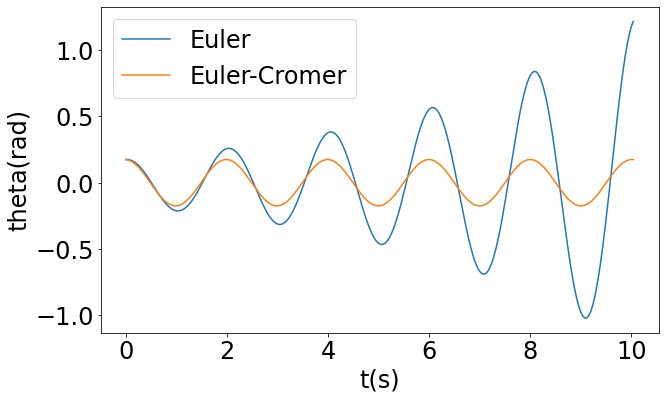

In [10]:
tf = 10
l = 1
dt = 0.04

theta0, omega0, ts0 = pend(l, dt, tf)

theta1, omega1, ts1 = pend_ec(l, dt, tf)

curve_plot([ts0, ts1], [theta0, theta1], 't(s)', 'theta(rad)',['Euler','Euler-Cromer'])

同时，我们可以在计算的同时，计算每一步的能量变化。

In [11]:
# 使用欧拉--克尔莫方法，同时计算能量变化
def pend_ec_with_E(l, dt, tf):
    t = 0
    omega, theta, ts, E = [0], [np.pi/18], [t], [0.5 * l * 9.8 * (np.pi/18)**2]

    while(t < tf):
        omega.append(omega[-1] - 9.8 * theta[-1] * dt / l) 
        theta.append(theta[-1] + omega[-1] * dt)
        E.append(0.5 * l**2 * (omega[-1]**2 + 9.8 / l * theta[-1]**2))
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(E), np.array(ts))

In [12]:
tf = 10
l = 1
dt = 0.04

theta0, omega0, E0, ts0 = pend_ec_with_E(l, dt, tf)

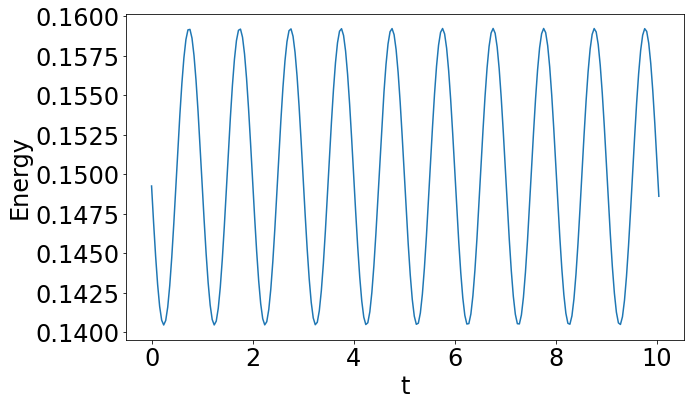

In [13]:
curve_plot(ts0, E0, 't', 'Energy')

从上图我们会发现，尽管欧拉--克尔莫方法并不能使能量完全守恒，但它可以让能量在一个周期内的平均值守恒。因此，在振荡系统的数值求解中，使用欧拉--克尔莫方法往往是一种合理的选择。

## 2. 考虑耗散、以及外力的单摆运动

和我们之前考虑过的无摩擦的自行车运动一样，无摩擦的单摆振荡在现实生活中同样也不会存在。因此，我们有必要考虑更多现实中的实际修正。

首先，我们将尝试囊括摩擦带来的影响。通常我们也称这样的影响为系统的阻尼或者“耗散(dissipation)”。和自行车运动的阻力以空气阻力为主不同，单摆系统中的耗散项来源可能很复杂。综合的来说，我们选择以阻力项正比于角速度$\omega$作为我们的模型。我们可以写下考虑阻力时的单摆运动方程：

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \theta - q \frac{d\theta}{d t},
$$

其中第二项即为阻力项。

In [14]:
# 使用欧拉--克尔莫方法
def pend_frict_ec(l, dt, tf, q):
    t = 0
    omega, theta, ts = [0], [np.pi/18], [t]

    while(t < tf):
        omega.append(omega[-1] - 9.8 * theta[-1] * dt / l - q * omega[-1] * dt) 
        theta.append(theta[-1] + omega[-1] * dt)  # 注意，这里用的是omega[-1]，思考一下为什么
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(ts))

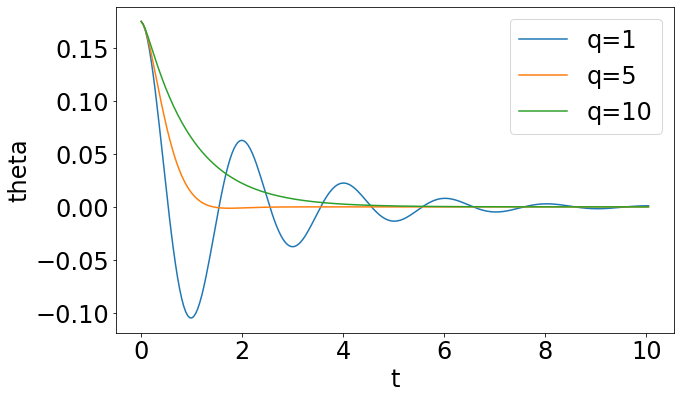

In [15]:
tf = 10
l = 1
dt = 0.04

theta0, omega0, ts0 = pend_frict_ec(l, dt, tf, q=1)
theta1, omega1, ts1 = pend_frict_ec(l, dt, tf, q=5)
theta2, omega2, ts2 = pend_frict_ec(l, dt, tf, q=10)

curve_plot([ts0, ts1, ts2], [theta0, theta1, theta2], 't', 'theta', ['q=1', 'q=5', 'q=10'])

当$q$取不同值时，$\theta$呈现不同的模式，而这对应着所谓的“欠阻尼”或者“过阻尼”状态。

这些结果看起来好像没那么有趣？让我们接着尝试在单摆中加入一个周期性的外力，使运动方程变为：

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \theta - q \frac{d\theta}{d t} + F_D \sin (\Omega_D t),
$$

这里的$\Omega_D$代表的外力的频率，它将会和这个系统内秉的频率相互“竞争”。让我们用程序解决这个问题

In [16]:
# 使用欧拉--克尔莫方法
def pend_with_D( l, dt, tf, q, FD, OmegaD, theta0=np.pi/18):
    t = 0
    omega, theta, ts = [0], [theta0], [t]

    while(t < tf):
        omega.append(omega[-1] 
                     - 9.8 * theta[-1] * dt / l - q * omega[-1] * dt
                    + FD * np.sin(OmegaD * t) * dt) 
        theta.append(theta[-1] + omega[-1] * dt) 
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(ts))

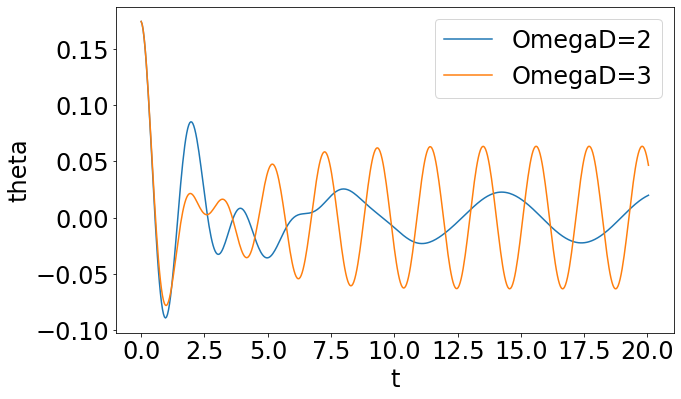

In [177]:
tf = 20
l = 1
dt = 0.04


theta0, omega0, ts0 = pend_with_D(l, dt, tf, q=1, FD=0.2, OmegaD=1)
theta1, omega1, ts1 = pend_with_D(l, dt, tf, q=1, FD=0.2, OmegaD=3)

curve_plot([ts0, ts1], [theta0, theta1], 't', 'theta', ['OmegaD=2', 'OmegaD=3'])

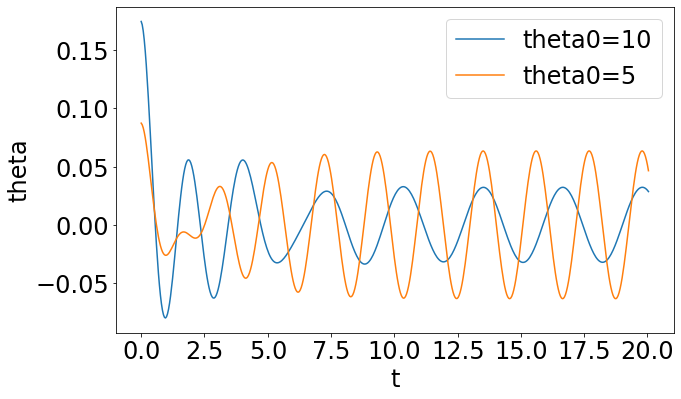

In [18]:
tf = 20
l = 1
dt = 0.04


theta0, omega0, ts0 = pend_with_D(l, dt, tf, q=1, FD=0.2, OmegaD=2, theta0=np.pi/18)
theta1, omega1, ts1 = pend_with_D(l, dt, tf, q=1, FD=0.2, OmegaD=3, theta0=np.pi/36)

curve_plot([ts0, ts1], [theta0, theta1], 't', 'theta', ['theta0=10', 'theta0=5'])


我们会发现，振幅会随着$\Omega_D$变化而变化，最后会在$\Omega_D = \Omega$时达到最大，这就是所谓的“共振现象”。而振动的频率和振幅甚至也会依赖于初始起点位置$\theta_0$。

至此，我们研究的内容还算“简单”，尽管这些振荡的系统看起来比较复杂，但获得其解析解的过程尽管繁琐，但并非不可能。而数值方法的引入让求解过程更加简单明了。下面我们将介绍一些无法用解析解很好描述的系统。

## 3. 混沌系统

还记得我们对单摆问题的假设吗？现在开始，让我们尝试去掉其中最重要的一条假设--小角度假设。从而考虑这样的完整的运动方程。

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin \theta - q \frac{d\theta}{d t} + F_D \sin (\Omega_D t),
$$

这是一个非线性方程，对这样方程的研究突然会变的十分困难，但其中蕴含了很多丰富的物理过程。下面让我们尝试用我们所学习到的数值工具去研究它。

我们只需要简单改造之前的函数，我们需要考虑当摆动角度大于$[-\pi, +\pi]$区间时的处理方式。

我们可以简单的让$\theta$在大于或者小于$[-\pi, +\pi]$时，让其减去或加上$2\pi$，使其回到该区间。

In [19]:
# 使用欧拉--克尔莫方法
def pend_with_D( l, dt, tf, q, FD, OmegaD, theta0=np.pi/18):
    t = 0
    omega, theta, ts = [0], [theta0], [t]

    while(t < tf):
        omega.append(omega[-1] 
                     - 9.8 * np.sin(theta[-1]) * dt / l - q * omega[-1] * dt
                    + FD * np.sin(OmegaD * t) * dt) 
        theta.append(theta[-1] + omega[-1] * dt) 
        if(theta[-1] > np.pi):
            theta[-1] -= 2 * np.pi
        elif(theta[-1] < -np.pi):
            theta[-1] += 2 * np.pi
            
        t += dt
        ts.append(t)
    return (np.array(theta), np.array(omega), np.array(ts))

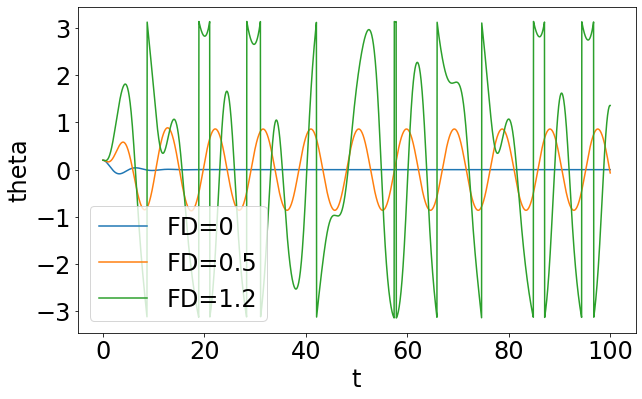

In [20]:
tf = 100
l = 9.8
dt = 0.04


theta0, omega0, ts0 = pend_with_D(l, dt, tf, q=0.5, FD=0, OmegaD=2/3, theta0=0.2)
theta1, omega1, ts1 = pend_with_D(l, dt, tf, q=0.5, FD=0.5, OmegaD=2/3, theta0=0.2)
theta2, omega2, ts2 = pend_with_D(l, dt, tf, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)


curve_plot([ts0, ts1,ts2], [theta0, theta1, theta2], 't', 'theta', ['FD=0', 'FD=0.5', 'FD=1.2'])

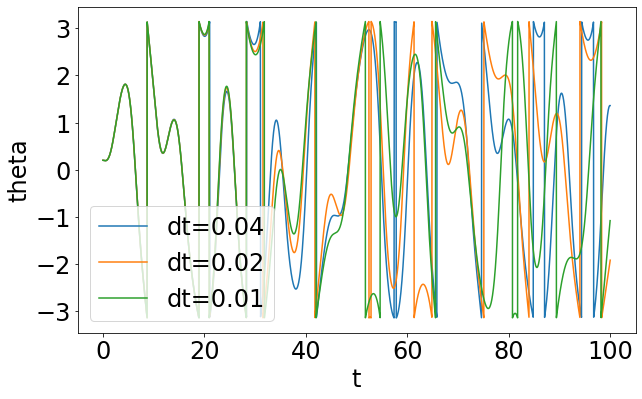

In [21]:

theta0, omega0, ts0 = pend_with_D(l, dt=0.04, tf=100, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)
theta1, omega1, ts1 = pend_with_D(l, dt=0.02, tf=100, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)
theta2, omega2, ts2 = pend_with_D(l, dt=0.01, tf=100, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)


curve_plot([ts0, ts1,ts2], [theta0, theta1, theta2], 't', 'theta', ['dt=0.04', 'dt=0.02', 'dt=0.01'])


我们会发现，当外力大小$F_D$达到某个值后，单摆的运动不再呈现任何的周期性，而变得毫无规律的摆动。这稍微有点不寻常，因为单摆是一个拥有内秉频率的系统，而外力也是一个周期性的外力。也就是说，两个周期性的系统叠加，产生了非周期，很难预测的结果！

这就是一个很简单的“混沌”系统的例子。

而如果我们回到我们的微分方程

$$
\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin \theta - q \frac{d\theta}{d t} + F_D \sin (\Omega_D t),
$$
这是一个二阶常微分方程。理论上，如果2个初始值确定，方程在以后**“所有”**时间的演化都**“完全”**的确定。

尽管看起来好像有些矛盾，但事实上，对于这样的混沌系统，它是一种即“确定”，由“不可预测”的。

下面我们再举一个例子来说明这一情况。

考虑两个几乎相同的单摆，他们唯一的区别在于起始的角度$\theta_0$有所不同（相差0.002）。然后我们在分别在非混沌和混沌的振动模式下，画出他们的角度之差。

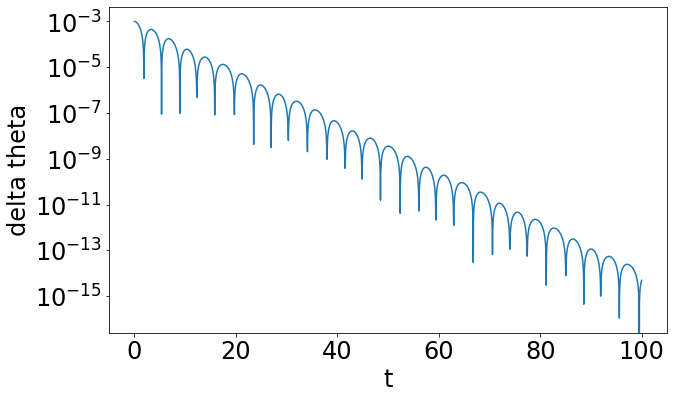

In [22]:
tf = 100
l = 9.8
dt = 0.04

# 计算两个FD=0.5的单摆（非混沌解），区别在于初始的角度theta0相差0.001弧度
theta0, omega0, ts0 = pend_with_D(l, dt, tf, q=0.5, FD=0.5, OmegaD=2/3, theta0=0.2)
theta1, omega1, ts1 = pend_with_D(l, dt, tf, q=0.5, FD=0.5, OmegaD=2/3, theta0=0.2+0.001)

# 计算单摆角度差的绝对值
curve_plot(ts0, np.abs(theta0-theta1), islog=True, xlabel='t', ylabel='delta theta')

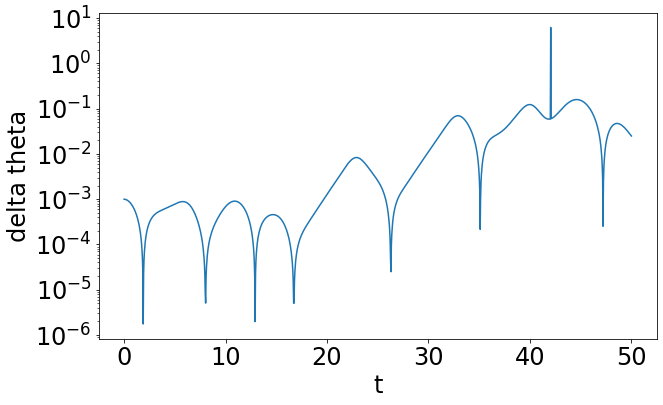

In [23]:
tf = 50
l = 9.8
dt = 0.04

# 计算两个FD=1.2的单摆（混沌解），区别在于初始的角度theta0相差0.001弧度
theta0, omega0, ts0 = pend_with_D(l, dt, tf, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)
theta1, omega1, ts1 = pend_with_D(l, dt, tf, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2+0.001)

# 计算单摆角度差的绝对值
curve_plot(ts0, np.abs(theta0-theta1), islog=True, xlabel='t', ylabel='delta theta')

比较两幅图我们会发现，对于非混沌的情况，两种单摆的角度差越来越小，说明了两种单摆的振荡模式逐渐趋同。
而只要改变$F_D$，让振动模式变成混沌模式，两个单摆的角度之差会迅速（指数级）增加。

对于一个真实的物理系统，我们可能永远无法准确的知道初始状态，而如果系统处在混沌模式，这会导致我们的预测产生指数级的偏差。尽管这样的系统可能是“确定性的”（deterministic），同时也是无法预测（unpredictable）的。

在实际的系统分析中，有时针对“相空间”进行分析时一种更加直观和使用的方法。在我们所研究的这个受迫振动的系统中，我们的相空间变量为$\theta$和$\omega$,因此，我们可以尝试绘制只包含着两个变量的所谓“相图”：


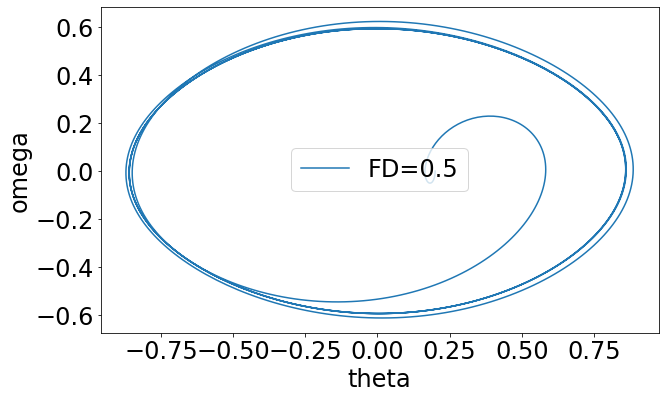

In [52]:
# FD = 0.5， 非混沌
theta0, omega0, ts0 = pend_with_D(l=9.8, dt=0.04, tf=50, q=0.5, FD=0.5, OmegaD=2/3, theta0=0.2)
curve_plot(theta0, omega0, xlabel='theta', ylabel='omega', legends=['FD=0.5'])

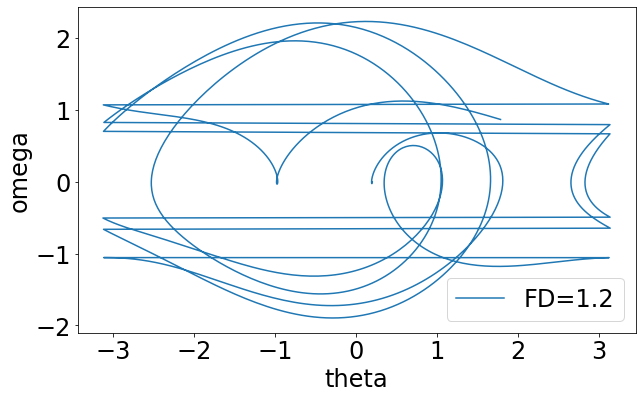

In [161]:
# FD=1.2 混沌
theta0, omega0, ts0 = pend_with_D(l=9.8, dt=0.04, tf=50, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)
curve_plot(theta0, omega0, xlabel='theta', ylabel='omega', legends=['FD=1.2'])

从上面两张相图可以看出对于混沌和非混沌的系统，他们的相图有明显的区别。

我们可以从另一个角度凸显这种区别，我们可以尝试以$\Omega_D$的频率，给相图“拍一张照片”。具体的说，我们可以只保留相图中对应了$Omega_D t=2\pi n$的点。

In [165]:
# FD = 0.5， 非混沌
dt = 0.04
theta0, omega0, ts0 = pend_with_D(l=9.8, dt=0.01, tf=50, q=0.5, FD=0.5, OmegaD=2/3, theta0=0.2)
theta1, omega1, ts1 = pend_with_D(l=9.8, dt=0.01, tf=5000, q=0.5, FD=1.2, OmegaD=2/3, theta0=0.2)
# |t - 2pi n / Omega_D| < dt / 2

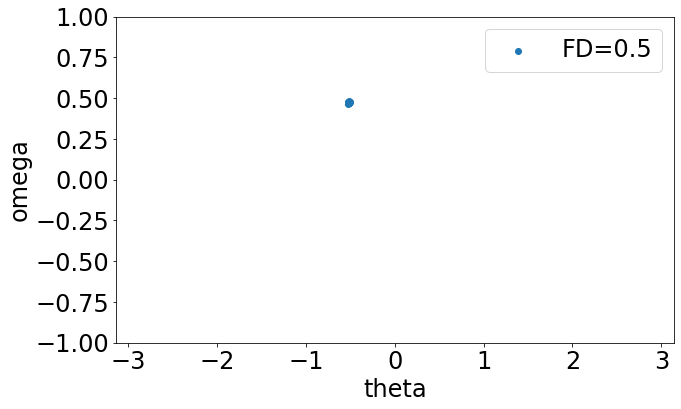

In [170]:
OmegaD = 2 / 3
T =  (2 * np.pi / OmegaD)
ns = (ts0 / T).round()

sample = (np.abs(ts0 - ns * T) <= dt/2 )
sample[0:1000] = False

curve_plot(theta0[sample], omega0[sample], xlabel='theta', 
           ylabel='omega', legends=['FD=0.5'], xlim=[-np.pi,np.pi], ylim=[-1,1], scatter='True')

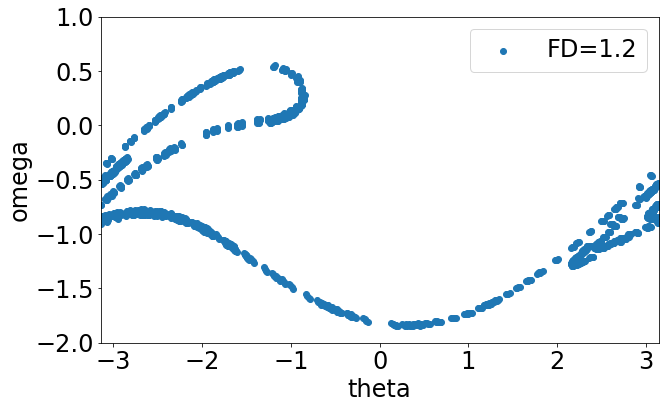

In [168]:
OmegaD = 2 / 3

T =  (2 * np.pi / OmegaD)
ns = (ts1 / T).round()

sample = np.abs(ts1 - ns * T) < dt/2 
sample[0:1000] = False

curve_plot(theta1[sample], omega1[sample], xlabel='theta', 
           ylabel='omega', legends=['FD=1.2'], xlim=[-np.pi,np.pi], ylim=[-2,1], scatter=True)

而这种相图，展示了所谓的“吸引子（atractor）”模式。在受迫振动的模式中，吸引子代表了系统在时间演化中所趋向的状态。

在非混沌系统中，吸引子往往只是一个点。而在混沌系统中，吸引子不仅是相空间中的线，其更呈现出了一些所谓的“分形结构”！